# Predicting Customer Churn in the Telecommunication Industry

## 1. Introduction

In this notebook,  this project will be about predicting on customer churn for telecommunication and I have sourced a dataset from Kaggle. 

(accessible through the following link: https://www.kaggle.com/datasets/blastchar/telco-customer-churn). 

**What is Customer Churn?**

Customer churn is a common challenge faced by telecommunication companies including our own. In simple explanation, it refers to the scenario where customers terminate their contracts with our company and this may caused a substantial decrease in the company's revenue streams. This phenomenon also can lead to several adverse consequences for the company such as affecting our company's reputation. Furthermore, customer churn can be a costly issue as it may need to allocate additional resources to acquire new customers and retain their existing ones. Therefore, imperative for our company to address this issue proactively by identifying the underlying causes of customer churn and implementing effective strategies to mitigate it.

## 2. Import Packages and Load the data

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn import metrics
from pandas.api.types import is_object_dtype
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import recall_score, confusion_matrix, precision_score,f1_score, accuracy_score, classification_report, precision_recall_fscore_support, roc_curve,auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.exceptions import ConvergenceWarning
from bayes_opt import BayesianOptimization
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from skopt.space import Real, Integer
from prettytable import PrettyTable

In [2]:
# Load the dataset into a Pandas dataframe
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

## 3. Understanding the data

Each row in the data table represents a distinct customer entity while each column corresponds to the customer's attributes that are specified in the respective column's metadata.

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Check the shape of the dataframe
df.shape

(7043, 21)

In [5]:
# Check the columns names of the dataframe
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [6]:
# Display basic information about the dataframe
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Based on the above cell, here is the summary for each column:

1) **Numerical**:

- **Senior Citizen**: A binary variable indicating whether the customer is a senior citizen or not.
- **Tenure**: The number of months the customer has remained subscribed to the company.
- **Monthly Charges**: The amount charged to the customer each month.
- **Total Charges**: The total amount charged to the customer.

2) **Categorical**:

- **Gender**: A binary variable indicating whether the customer is male or female.
- **Partner**: A binary variable indicating whether the customer has a partner.
- **Dependents**: A binary variable indicating whether the customer has dependents or not.
- **Phone Service**: A binary variable indicating whether the customer has subscribed to phone service or not.
- **Multiple Lines**: A categorical variable indicating whether the customer has multiple lines, single line, or no phone service.
- **Internet Service**: A categorical variable indicating the type of internet service provider subscribed to by the customer (DSL, Fiber optic, No).
- **Online Security**: A binary variable indicating whether the customer has subscribed to online security, not subscribed, or has no internet service.
- **Online Backup**: A binary variable indicating whether the customer has subscribed to online backup, not subscribed, or has no internet service.
- **Device Protection**: A binary variable indicating whether the customer has subscribed to device protection, not subscribed, or has no internet service.
- **Tech Support**: A binary variable indicating whether the customer has subscribed to tech support, not subscribed, or has no internet service.
- **Streaming TV**: A binary variable indicating whether the customer has subscribed to streaming TV, not subscribed, or has no internet service.
- **Streaming Movies**: A binary variable indicating whether the customer has subscribed to streaming movies, not subscribed, or has no internet service.
- **Contract**: A categorical variable indicating the contract term of the customer (Month-to-month, One year, Two year).
- **Paperless Billing**: A binary variable indicating whether the customer has opted for paperless billing or not.
- **Payment Method**: A categorical variable indicating the payment method of the customer (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)).

## 4. Data Preprocess

In [7]:
# Replace blank spaces with NaN
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)

# Convert the TotalCharges column to float
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [8]:
# Count the number of missing values in each column of the dataframe
num_missing = df.isnull().sum()

# Display the number of missing values in each column
print(num_missing)

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


Below cell will display all the values that is NaN

In [9]:
# Identify rows with missing values
missing_rows = df[df.isnull().any(axis=1)]

# Print the missing rows
missing_rows

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [10]:
# Drop rows with missing values
df = df.drop(missing_rows.index)

In order to avoid the issue of missing values present in the TotalCharges column, we impute the missing values with the mean value of the existing TotalCharges data.

In [11]:
#Replace any missing value with the mean
df.fillna(df["TotalCharges"].mean())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [12]:
# sum the total if there are null values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [13]:
# This line maps the values of "SeniorCitizen" column to "No" or "Yes"
df["SeniorCitizen"] = df["SeniorCitizen"].map({0: "No", 1: "Yes"})

df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,No,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,No,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,No,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,No,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,No,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [14]:
# Drop the 'customerID' column since it is irrelevant
df = df.drop('customerID', axis=1)

Creating numerical and categorical lists

In [15]:
# Get column data types
dtypes = df.dtypes

# Separate columns into categorical and numeric
categoric_columns = list(dtypes[dtypes == 'object'].index)
numeric_columns = list(dtypes[dtypes != 'object'].index)

# Remove the target column from the categorical columns
if 'Churn' in categoric_columns:
    categoric_columns.remove('Churn')

# Remove columns with low cardinality from the categorical columns
for column in categoric_columns:
    if len(df[column].unique()) > 6:
        numeric_columns.append(column)
        categoric_columns.remove(column)

In [16]:
print('Numerical fetures: ',numeric_columns)
print('\nCategorical fetures: ',categoric_columns)

Numerical fetures:  ['tenure', 'MonthlyCharges', 'TotalCharges']

Categorical fetures:  ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


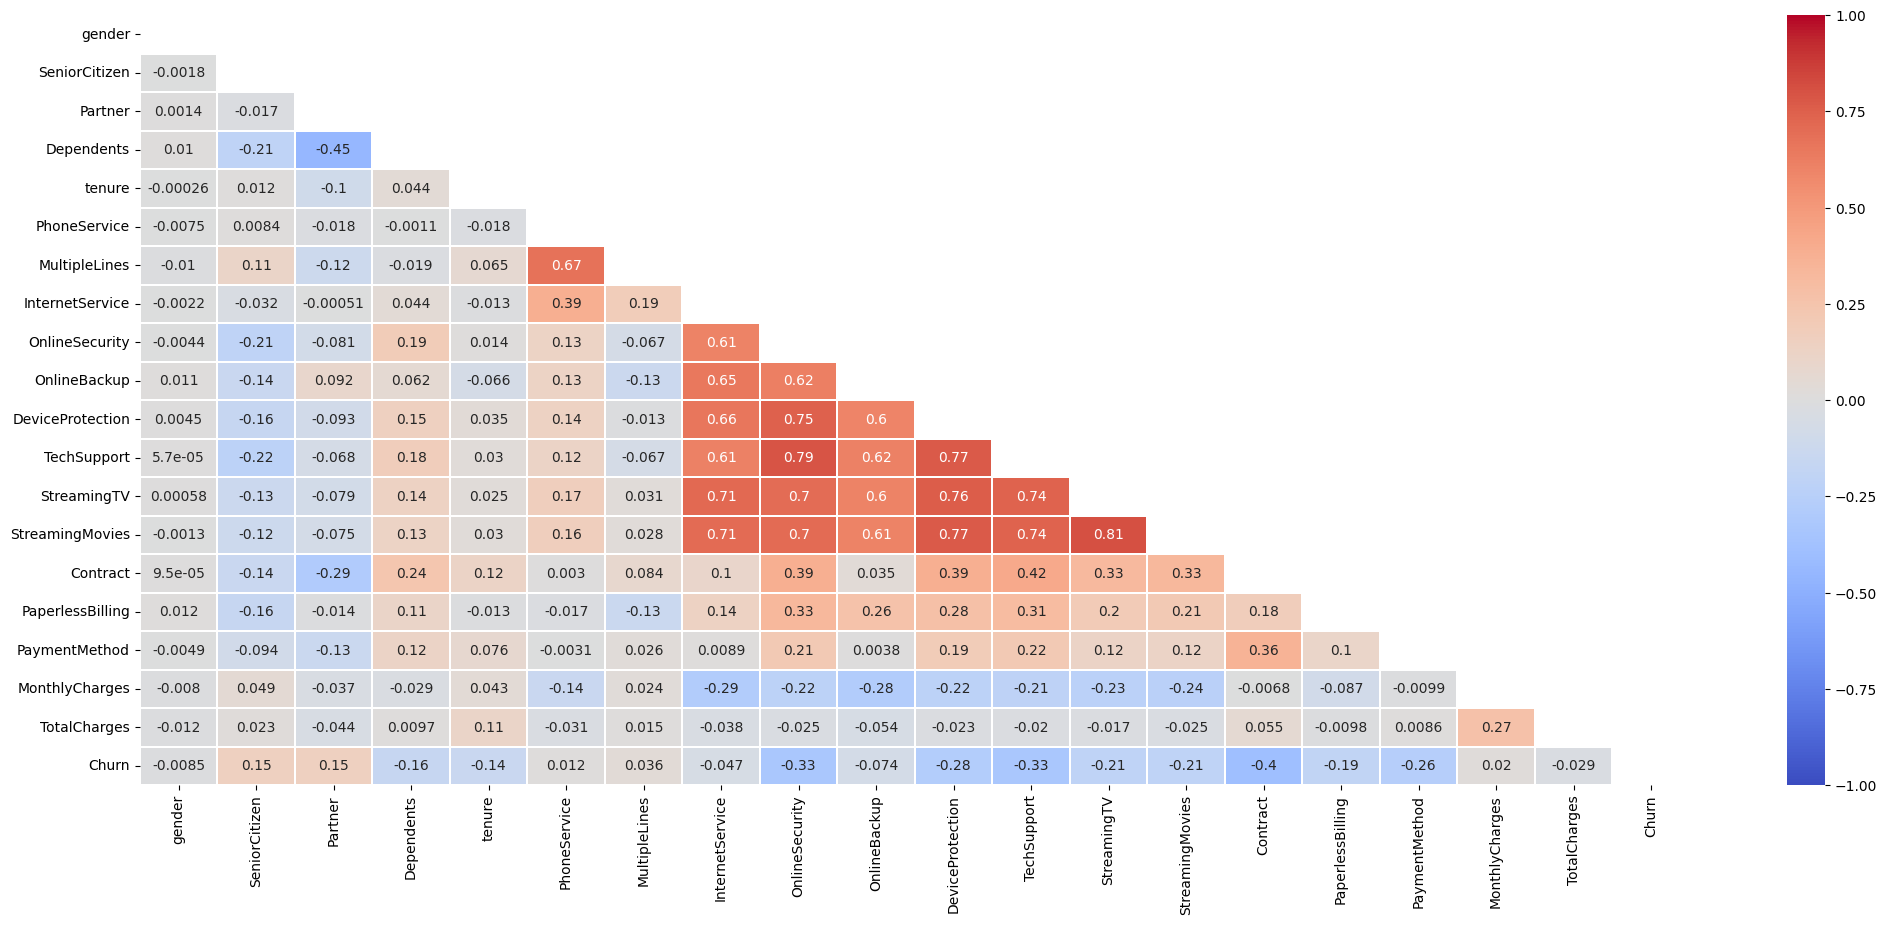

In [17]:
# Set the size of the figure to 25 x 10 inches
plt.figure(figsize=(25, 10))

# Apply factorization to each column in the dataframe and compute the correlation matrix
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()

# Create a boolean mask for the upper triangle of the correlation matrix
mask = np.triu(np.ones_like(corr, dtype=bool))

# Create a heatmap of the correlation matrix with annotations and specific color scheme
ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

In [18]:
# Map the values in the 'Churn' column to binary values of 1 and 0
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [19]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


## 5. Feature Engineering

Split the dataframe into features (X) and target variable (y)

In [20]:
# 'Churn' is used as the target variable, so it is dropped from the features
X = df.drop('Churn', axis=1)
y = df['Churn'].values

In [21]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12, stratify=y)

In [22]:
# Create a new instance of the StandardScaler() class
Standard_Scaler = StandardScaler()

# Fit the scaler to the numeric columns in the training set, and transform the values
X_train[numeric_columns] = Standard_Scaler.fit_transform(X_train[numeric_columns])

# Transform the numeric columns in the test set using the scaler fitted to the training set
X_test[numeric_columns] = Standard_Scaler.transform(X_test[numeric_columns])

In [23]:
# Create a column transformer to one-hot encode the categorical columns in the dataset
# The OneHotEncoder will ignore unknown categories encountered during the encoding process
# The column transformer is applied only to the columns specified in categoric_columns
transformer = make_column_transformer((OneHotEncoder(handle_unknown='ignore'), categoric_columns))

In [24]:
# Fit the column transformer on the training features
# The transformed data is returned as a sparse matrix
transformed = transformer.fit_transform(X_train)

# Create a dataframe of the transformed data, using the feature names obtained from the transformer
transformed_df = pd.DataFrame(transformed, columns=transformer.get_feature_names_out())

# Set the index of the transformed dataframe to match that of the original training features
transformed_df.index = X_train.index

# Concatenate the original training features with the transformed dataframe along the columns axis
X_train = pd.concat([X_train, transformed_df], axis=1)

# Drop the original categorical columns from the training features dataframe
X_train.drop(categoric_columns, axis=1, inplace=True)

# Print the head of the transformed training features dataframe
X_train.head()

,tenure,MonthlyCharges,TotalCharges,onehotencoder__gender_Female,onehotencoder__gender_Male,onehotencoder__SeniorCitizen_No,onehotencoder__SeniorCitizen_Yes,onehotencoder__Partner_No,onehotencoder__Partner_Yes,onehotencoder__Dependents_No,...,onehotencoder__StreamingMovies_Yes,onehotencoder__Contract_Month-to-month,onehotencoder__Contract_One year,onehotencoder__Contract_Two year,onehotencoder__PaperlessBilling_No,onehotencoder__PaperlessBilling_Yes,onehotencoder__PaymentMethod_Bank transfer (automatic),onehotencoder__PaymentMethod_Credit card (automatic),onehotencoder__PaymentMethod_Electronic check,onehotencoder__PaymentMethod_Mailed check
3253,0.138725,1.319638,0.615067,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
553,-0.389919,-1.307406,-0.784415,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1824,1.602664,-1.483875,-0.393114,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
5862,-0.633909,0.187578,-0.497098,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
6813,1.277344,-0.566573,0.377810,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


In [25]:
# Transform the test features using the fitted column transformer
# The transformed data is returned as a sparse matrix
transformed = transformer.transform(X_test)

# Create a dataframe of the transformed test features, using the feature names obtained from the transformer
transformed_df = pd.DataFrame(transformed, columns=transformer.get_feature_names_out())

# Set the index of the transformed test features dataframe to match that of the original test features
transformed_df.index = X_test.index

# Concatenate the original test features with the transformed test features dataframe along the columns axis
X_test = pd.concat([X_test, transformed_df], axis=1)

# Drop the original categorical columns from the test features dataframe
X_test.drop(categoric_columns, axis=1, inplace=True)

# Print the head of the transformed test features dataframe
X_test.head()

,tenure,MonthlyCharges,TotalCharges,onehotencoder__gender_Female,onehotencoder__gender_Male,onehotencoder__SeniorCitizen_No,onehotencoder__SeniorCitizen_Yes,onehotencoder__Partner_No,onehotencoder__Partner_Yes,onehotencoder__Dependents_No,...,onehotencoder__StreamingMovies_Yes,onehotencoder__Contract_Month-to-month,onehotencoder__Contract_One year,onehotencoder__Contract_Two year,onehotencoder__PaperlessBilling_No,onehotencoder__PaperlessBilling_Yes,onehotencoder__PaymentMethod_Bank transfer (automatic),onehotencoder__PaymentMethod_Credit card (automatic),onehotencoder__PaymentMethod_Electronic check,onehotencoder__PaymentMethod_Mailed check
5153,0.342050,0.988344,0.688568,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6171,1.074020,0.795228,1.349505,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1345,0.992690,1.194778,1.630421,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
6461,0.667370,0.680357,0.885675,0.0,1.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1637,1.358674,-1.179217,-0.136191,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


## 6. Machine Learning Model, Hyperparameter, Model Evaluations

### Adaboost Classifier

In [26]:
# Define the objective function for Bayesian Optimization
def objective_function(n_estimators, learning_rate):
    # Define the AdaBoost classifier with the specified hyperparameters
    ada_boost = AdaBoostClassifier(n_estimators=int(n_estimators), learning_rate=learning_rate, random_state=12)
    # Use 5-fold cross-validation to evaluate the classifier's performance
    score = cross_val_score(ada_boost, X_train, y_train, cv=5, scoring='accuracy').mean()
    # Return the mean accuracy score
    return score

# Define the search space for hyperparameters
pbounds = {'n_estimators': (50, 200), 'learning_rate': (0.01, 1)}

# Create the optimizer
adaboost_optimizer = BayesianOptimization(f=objective_function, pbounds=pbounds, random_state=16)

# Perform the optimization
adaboost_optimizer.maximize(init_points=5, n_iter=25)

# Print the best hyperparameters and the corresponding accuracy score
adaboost_best_params = adaboost_optimizer.max['params']
print('Best hyperparameters:', adaboost_best_params)
print('Best accuracy score:', adaboost_optimizer.max['target'])

|   iter    |  target   | learni... | n_esti... |
-------------------------------------------------
| 1         | 0.8046    | 0.2311    | 128.5     |
| 2         | 0.8005    | 0.5552    | 56.84     |
| 3         | 0.8056    | 0.3671    | 83.46     |
| 4         | 0.8007    | 0.6918    | 74.56     |
| 5         | 0.8041    | 0.07962   | 191.2     |
| 6         | 0.8037    | 0.6368    | 161.5     |
| 7         | 0.8019    | 0.8896    | 198.1     |
| 8         | 0.8048    | 0.2743    | 62.64     |
| 9         | 0.8041    | 0.3002    | 62.62     |
| 10        | 0.8048    | 0.4758    | 83.4      |
| 11        | 0.8021    | 0.5911    | 70.39     |
| 12        | 0.8066    | 0.4031    | 83.62     |
| 13        | 0.8056    | 0.2387    | 83.76     |
| 14        | 0.78      | 0.03845   | 62.76     |
| 15        | 0.8039    | 0.1542    | 166.6     |
| 16        | 0.8039    | 0.1735    | 83.57     |
| 17        | 0.8039    | 0.1774    | 83.6      |
| 18        | 0.8044    | 0.1314    | 100.2     |


In [27]:
# Create an AdaBoostClassifier with the specified best parameters obtained from hyperparameter tuning
adaboost_model = AdaBoostClassifier(n_estimators=int(adaboost_best_params['n_estimators']), learning_rate=adaboost_best_params['learning_rate'], random_state=42)

# Fit the AdaBoostClassifier on the training features and target variables
adaboost_model.fit(X_train, y_train)

# Generate predictions on the test features using the trained AdaBoostClassifier
adaboost_preds = adaboost_model.predict(X_test)

# Compute and print the accuracy of the AdaBoostClassifier on the test set
print("AdaBoost Classifier accuracy:")
metrics.accuracy_score(y_test, adaboost_preds)

AdaBoost Classifier accuracy:


0.7985781990521327

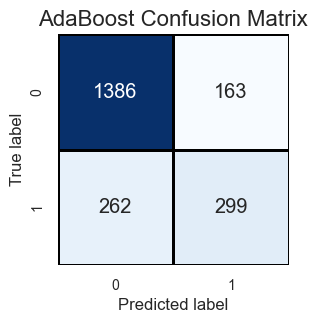

In [28]:
# Set the size of the figure to 4 x 3 inches
plt.figure(figsize=(4, 3))

# Set the font size for the heatmap
sns.set(font_scale=1.2)

# Create a heatmap of the confusion matrix using seaborn
# The annotations are displayed as integers (fmt="d") and the color scheme is set to Blues
# The color bar is disabled, and the linewidth and linecolor of the heatmap are customized
# The heatmap is set to have square cells
sns.heatmap(confusion_matrix(y_test, adaboost_preds),
            annot=True, 
            fmt="d",
            cmap="Blues",
            cbar=False,
            linewidths=1,
            linecolor="black",
            square=True)

# Set the title, x-axis label, and y-axis label for the heatmap
# The font sizes of the labels and tick marks are customized
plt.title("AdaBoost Confusion Matrix", fontsize=16)
plt.xlabel("Predicted label", fontsize=12)
plt.ylabel("True label", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Show the heatmap
plt.show()

In [29]:
# Compute the precision, recall, f1-score, and support for the AdaBoostClassifier
# The weighted average of these metrics is used as an evaluation metric
precision_adaboost, recall_adaboost, f1_adaboost, support = precision_recall_fscore_support(y_test, adaboost_preds, average='weighted')

# Compute the accuracy of the AdaBoostClassifier on the test set
accuracy_adaboost = accuracy_score(y_test, adaboost_preds)

# Print the evaluation metrics for the AdaBoostClassifier
print("Accuracy: {:.2%}".format(accuracy_adaboost))
print("Weighted Average Precision: {:.2%}".format(precision_adaboost))
print("Weighted Average Recall: {:.2%}".format(recall_adaboost))
print("Weighted Average F1-score: {:.2%}".format(f1_adaboost))

Accuracy: 79.86%
Weighted Average Precision: 78.95%
Weighted Average Recall: 79.86%
Weighted Average F1-score: 79.20%


### Logistic Regression Classifier

In [30]:
# Define the objective function for Bayesian Optimization
def objective_function(C, penalty):
    if penalty < 0.5:
            penalty = 'l1'
    else:
        penalty = 'l2'

    # Define the logistic regression model with the specified hyperparameters
    lr = LogisticRegression(C=C, penalty=penalty,solver='liblinear', random_state=12)

    # Use 5-fold cross-validation to evaluate the classifier's performance
    score = cross_val_score(lr, X_train, y_train, cv=5, scoring='accuracy').mean()

    # Return the mean accuracy score
    return score

# Define the search space for hyperparameters
pbounds = {'C': (0.01, 10), 'penalty': (0,1)}

# Create the optimizer
lr_optimizer = BayesianOptimization(f=objective_function, pbounds=pbounds, random_state=16)

# Perform the optimization
lr_optimizer.maximize(init_points=5, n_iter=25)

# Print the best hyperparameters and the corresponding accuracy score
lr_best_params = lr_optimizer.max['params']
print('Best hyperparameters:', lr_best_params)
print('Best accuracy score:', lr_optimizer.max['target'])

|   iter    |  target   |     C     |  penalty  |
-------------------------------------------------
| 1         | 0.8046    | 2.241     | 0.5232    |
| 2         | 0.8046    | 5.512     | 0.0456    |
| 3         | 0.8048    | 3.614     | 0.2231    |
| 4         | 0.8048    | 6.89      | 0.1637    |
| 5         | 0.8035    | 0.7125    | 0.941     |
| 6         | 0.8046    | 8.156     | 0.9769    |
| 7         | 0.8046    | 10.0      | 0.0       |
| 8         | 0.8046    | 4.401     | 1.0       |
| 9         | 0.8046    | 6.436     | 1.0       |
| 10        | 0.8043    | 8.151     | 0.0       |
| 11        | 0.8043    | 3.167     | 1.0       |
| 12        | 0.8048    | 4.485     | 0.04646   |
| 13        | 0.8046    | 9.708     | 0.9999    |
| 14        | 0.8043    | 2.845     | 0.0       |
| 15        | 0.8048    | 6.894     | 0.1621    |
| 16        | 0.8046    | 7.271     | 0.9743    |
| 17        | 0.805     | 3.991     | 0.0       |
| 18        | 0.805     | 5.405     | 1.0       |


In [31]:
# Create a LogisticRegression model with the specified best parameters obtained from hyperparameter tuning
# The penalty parameter is set to 'l1' if the best penalty value is less than 0.5, otherwise it is set to 'l2'
# The solver used is 'liblinear', and the random state is set to 42
lr_model = LogisticRegression(C=lr_best_params['C'], penalty= 'l1' if lr_best_params['penalty'] < 0.5 else 'l2',solver='liblinear', random_state=42)

# Fit the LogisticRegression model on the training features and target variables
lr_model.fit(X_train, y_train)

# Generate predictions on the test features using the trained LogisticRegression model
lr_preds = lr_model.predict(X_test)

# Compute and print the accuracy of the LogisticRegression model on the test set
print("Logistic Regression accuracy:")
metrics.accuracy_score(y_test, lr_preds)

Logistic Regression accuracy:


0.7995260663507109

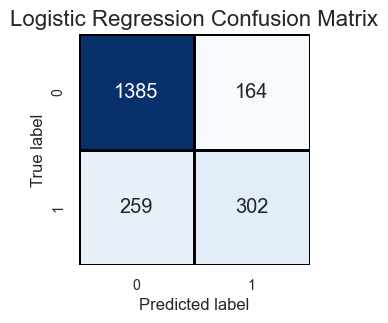

In [32]:
# Set the size of the figure to 4 x 3 inches
plt.figure(figsize=(4, 3))

# Set the font size for the heatmap
sns.set(font_scale=1.2)

# Create a heatmap of the confusion matrix using seaborn
# The annotations are displayed as integers (fmt="d") and the color scheme is set to Blues
# The color bar is disabled, and the linewidth and linecolor of the heatmap are customized
# The heatmap is set to have square cells
sns.heatmap(confusion_matrix(y_test, lr_preds),
            annot=True, 
            fmt="d",
            cmap="Blues",
            cbar=False,
            linewidths=1,
            linecolor="black",
            square=True)

# Set the title, x-axis label, and y-axis label for the heatmap
# The font sizes of the labels and tick marks are customized
plt.title("Logistic Regression Confusion Matrix", fontsize=16)
plt.xlabel("Predicted label", fontsize=12)
plt.ylabel("True label", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Show the heatmap
plt.show()

In [33]:
# Compute the precision, recall, f1-score, and support for the LogisticRegression model
# The weighted average of these metrics is used as an evaluation metric
precision_lr, recall_lr, f1_lr, support_lr = precision_recall_fscore_support(y_test, lr_preds, average='weighted')

# Compute the accuracy of the LogisticRegression model on the test set
accuracy_lr = accuracy_score(y_test, lr_preds)

# Print the evaluation metrics for the LogisticRegression model
print("Accuracy: {:.2%}".format(accuracy_lr))
print("Weighted Average Precision: {:.2%}".format(precision_lr))
print("Weighted Average Recall: {:.2%}".format(recall_lr))
print("Weighted Average F1-score: {:.2%}".format(f1_lr))

Accuracy: 79.95%
Weighted Average Precision: 79.08%
Weighted Average Recall: 79.95%
Weighted Average F1-score: 79.32%


### Neural Network

In [34]:
# Ignore convergence warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)
# Define the objective function
def objective_function_MLP(hidden_layer_size, learning_rate, alpha):
    hidden_layer_size = int(hidden_layer_size)
    learning_rate = learning_rate
    alpha = alpha
    model = MLPClassifier(hidden_layer_sizes=(hidden_layer_size,),learning_rate_init=learning_rate,alpha=alpha, solver='lbfgs')
    score = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean()
    # Return the mean accuracy score
    return score

# Define the search space for hyperparameters
pbounds ={
    'hidden_layer_size': (10, 200),
    'learning_rate': (1e-5, 1e-1),
    'alpha': (1e-5, 1e-1),
}

# Create the optimizer
nn_optimizer = BayesianOptimization(f=objective_function_MLP, pbounds=pbounds, random_state=16)

# Perform the optimization
nn_optimizer.maximize(init_points=5, n_iter=25)

# Print the best hyperparameters and the corresponding accuracy score
nn_best_params = nn_optimizer.max['params']
print('Best hyperparameters:', nn_best_params)
print('Best accuracy score:', nn_optimizer.max['target'])

|   iter    |  target   |   alpha   | hidden... | learni... |
-------------------------------------------------------------
| 1         | 0.7448    | 0.02234   | 109.4     | 0.05507   |
| 2         | 0.7448    | 0.00457   | 78.54     | 0.02232   |
| 3         | 0.7521    | 0.06888   | 41.11     | 0.007042  |
| 4         | 0.7493    | 0.0941    | 117.1     | 0.007808  |
| 5         | 0.7536    | 0.07227   | 40.11     | 0.02504   |
| 6         | 0.7568    | 0.07128   | 36.39     | 0.02903   |
| 7         | 0.7635    | 0.05632   | 28.29     | 0.09195   |
| 8         | 0.7684    | 0.04478   | 20.26     | 0.1       |
| 9         | 0.7846    | 0.01461   | 10.02     | 0.06933   |
| 10        | 0.7387    | 0.01022   | 200.0     | 0.05473   |
| 11        | 0.7471    | 0.09897   | 151.9     | 0.01711   |
| 12        | 0.7836    | 0.1       | 11.7      | 1e-05     |
| 13        | 0.7434    | 1e-05     | 174.4     | 0.1       |
| 14        | 0.7879    | 0.1       | 10.0      | 1e-05     |
| 15    

In [35]:
# Define the MLPClassifier with the best hyperparameters obtained from Bayesian optimization
hidden_layer_size = int(nn_best_params['hidden_layer_size'])
learning_rate = nn_best_params['learning_rate']
alpha = nn_best_params['alpha']
mlp_classifier = MLPClassifier(hidden_layer_sizes=(hidden_layer_size,),learning_rate_init=learning_rate,alpha=alpha, solver='lbfgs',random_state=42)

# Train the MLPClassifier model on the training data
mlp_classifier.fit(X_train, y_train)

# Generate predictions on the test data using the trained MLPClassifier model
mlp_preds = mlp_classifier.predict(X_test)

# Evaluate the performance of the MLPClassifier model on the test data
mlp_acc = accuracy_score(y_test, mlp_preds)
print("MLP Classifier accuracy:")
metrics.accuracy_score(y_test, mlp_preds)

MLP Classifier accuracy:


0.7895734597156399

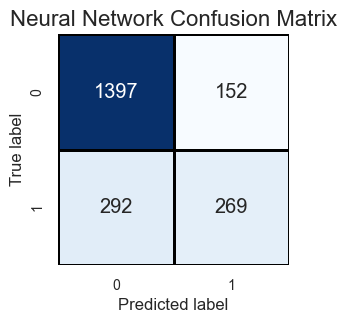

In [36]:
# Set the size of the figure to 4 x 3 inches
plt.figure(figsize=(4, 3))

# Set the font size for the heatmap
sns.set(font_scale=1.2)

# Create a heatmap of the confusion matrix using seaborn
# The annotations are displayed as integers (fmt="d") and the color scheme is set to Blues
# The color bar is disabled, and the linewidth and linecolor of the heatmap are customized
# The heatmap is set to have square cells
sns.heatmap(confusion_matrix(y_test, mlp_preds),
            annot=True, 
            fmt="d",
            cmap="Blues",
            cbar=False,
            linewidths=1,
            linecolor="black",
            square=True)

# Set the title, x-axis label, and y-axis label for the heatmap
# The font sizes of the labels and tick marks are customized
plt.title("Neural Network Confusion Matrix", fontsize=16)
plt.xlabel("Predicted label", fontsize=12)
plt.ylabel("True label", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Show the heatmap
plt.show()

In [37]:
# Compute the precision, recall, and F1-score for the MLPClassifier model predictions on the test data
# The "weighted" average is used, which takes into account the support for each class
# The support is the number of samples in each class
precision_nn, recall_nn, f1_nn, support_nn = precision_recall_fscore_support(y_test, mlp_preds, average='weighted')

# Compute the accuracy of the MLPClassifier model on the test data
accuracy_nn = accuracy_score(y_test, mlp_preds)

# Print the accuracy, precision, recall, and F1-score of the MLPClassifier model on the test data
print("Accuracy: {:.2%}".format(accuracy_nn))
print("Weighted Average Precision: {:.2%}".format(precision_nn))
print("Weighted Average Recall: {:.2%}".format(recall_nn))
print("Weighted Average F1-score: {:.2%}".format(f1_nn))

Accuracy: 78.96%
Weighted Average Precision: 77.71%
Weighted Average Recall: 78.96%
Weighted Average F1-score: 77.91%


### Voting Classifier

In [38]:
# Create three classifiers using the trained Adaboost, Logistic Regression, and MLPClassifier models
clf1 = adaboost_model
clf2 = lr_model
clf3 = mlp_classifier

# Create a voting classifier that combines the predictions of the three classifiers using soft voting
# Soft voting returns the class label that has the highest probability across all the classifiers
# The estimators argument is a list of (name, classifier) tuples
eclf1 = VotingClassifier(estimators=[('ada', clf1), ('lr', clf2), ('mlp', clf3)], voting='soft')

# Train the voting classifier on the training data
eclf1.fit(X_train, y_train)

# Generate predictions on the test data using the trained voting classifier
predictions = eclf1.predict(X_test)

# Compute the final accuracy score of the voting classifier on the test data
print("Final Accuracy Score ")
print(accuracy_score(y_test, predictions))

Final Accuracy Score 
0.8014218009478673


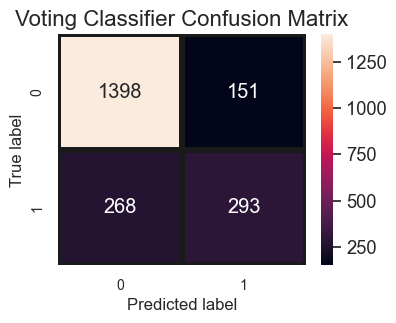

In [39]:
# Create a 4 x 3 inch figure to display the confusion matrix
plt.figure(figsize=(4,3))

# Create a heatmap of the confusion matrix using seaborn
# The annotations are displayed as integers (fmt="d") and the color scheme is set to Blues
# The linewidth and linecolor of the heatmap are customized
sns.heatmap(confusion_matrix(y_test, predictions),annot=True,fmt = "d",linecolor="k",linewidths=3)

# Set the title, x-axis label, and y-axis label for the heatmap
# The font sizes of the labels and tick marks are customized
plt.title("Voting Classifier Confusion Matrix",fontsize=16)
plt.xlabel("Predicted label", fontsize=12)
plt.ylabel("True label", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Show the heatmap
plt.show()

In [40]:
# Compute the precision, recall, and F1-score for the VotingClassifier model predictions on the test data
# The "weighted" average is used, which takes into account the support for each class
# The support is the number of samples in each class
precision_vote, recall_vote, f1_vote, support_vote = precision_recall_fscore_support(y_test, predictions, average='weighted')

# Compute the accuracy of the VotingClassifier model on the test data
accuracy_vote = accuracy_score(y_test, predictions)

# Print the accuracy, precision, recall, and F1-score of the VotingClassifier model on the test data
print("Accuracy: {:.2%}".format(accuracy_vote))
print("Weighted Average Precision: {:.2%}".format(precision_vote))
print("Weighted Average Recall: {:.2%}".format(recall_vote))
print("Weighted Average F1-score: {:.2%}".format(f1_vote))

Accuracy: 80.14%
Weighted Average Precision: 79.15%
Weighted Average Recall: 80.14%
Weighted Average F1-score: 79.35%


Additional analysis.

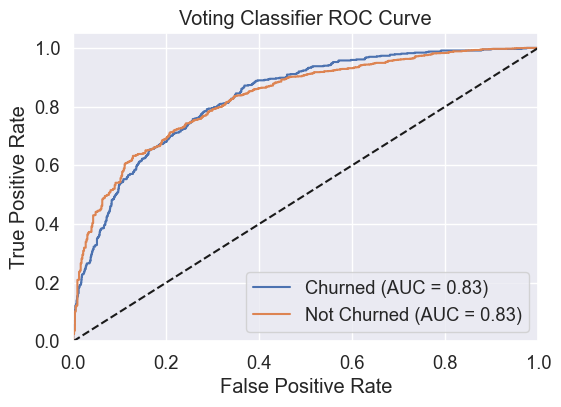

In [41]:
# Compute the predicted probabilities for each class
y_pred_prob = eclf1.predict_proba(X_test)

# Compute the false positive rate, true positive rate, and area under curve (AUC) for each class
fpr, tpr, _ = roc_curve(y_test, y_pred_prob[:, 1], pos_label=1)
fpr2, tpr2, _ = roc_curve(y_test, y_pred_prob[:, 0], pos_label=0)
roc_auc = auc(fpr, tpr)
roc_auc2 = auc(fpr2, tpr2)

# Plot the ROC curves for each class
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label='Churned (AUC = %0.2f)' % roc_auc)
plt.plot(fpr2, tpr2, label='Not Churned (AUC = %0.2f)' % roc_auc2)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Voting Classifier ROC Curve')
plt.legend(loc="lower right")
plt.show()

The AUC score of **0.83** for both classes depicted in the diagram above indicates that the model is effective in distinguishing between positive and negative samples, and it **performs significantly better than random guessing**. Additionally, both curves are situated closer to the top-left and bottom-left corners indicating that the **model's performance is reasonably satisfactory**. Overall, these findings suggest that the model is sufficiently accurate and reliable for the given task.

## Summary of this notebook

The project aims to develop a machine learning model to predict customer churn for a Telco company using the Telco Customer Churn dataset available on Kaggle. Several data preparation steps were conducted that includes removing missing values and feature scaling right before the machine learning model development.

Three machine learning models: Adaboost, Logistic Regression, and Neural Network were utilized to predict the customer churn. Then, Bayesian Optimization technique was used to select the optimal parameters for each classifier and the best parameters were used to train the respective models. To ensure the robustness of the prediction, a Voting Classifier was used as the final classifier to combine the outputs of the three models.

Several evaluation metrics were used to check the model's performance which are: Accuracy, Precision, Recall, F1-Score

In [42]:
# Define the table headers
table = PrettyTable(['Model', 'Accuracy', 'Precision', 'Recall', 'F1-score'])

# Add Adaboost Classifier results to the table
table.add_row(['Adaboost', accuracy_adaboost, precision_adaboost, recall_adaboost, f1_adaboost])

# Add Logistic Regression Classifier results to the table
table.add_row(['Logistic Regression', accuracy_lr, precision_lr, recall_lr, f1_lr])

# Add Neural Network Classifier results to the table
table.add_row(['Neural Network', accuracy_nn, precision_nn, recall_nn, f1_nn])

# Add Voting Classifier results to the table
table.add_row(['Voting Classifier (Final)', accuracy_vote,precision_vote, recall_vote, f1_vote])

# Print the table
print(table)

+---------------------------+--------------------+--------------------+--------------------+--------------------+
|           Model           |      Accuracy      |     Precision      |       Recall       |      F1-score      |
+---------------------------+--------------------+--------------------+--------------------+--------------------+
|          Adaboost         | 0.7985781990521327 | 0.7894836522470765 | 0.7985781990521327 | 0.7919506501111802 |
|    Logistic Regression    | 0.7995260663507109 | 0.7907739661693439 | 0.7995260663507109 | 0.7932362116681343 |
|       Neural Network      | 0.7895734597156399 | 0.7770887926641444 | 0.7895734597156399 |  0.77912266497746  |
| Voting Classifier (Final) | 0.8014218009478673 | 0.7914836909530047 | 0.8014218009478673 | 0.7934760917134933 |
+---------------------------+--------------------+--------------------+--------------------+--------------------+


Based on the evaluation metrics in the above table, the models achieved moderate to high accuracy, precision, recall, and F1-score. As a result, this project demonstrates the effectiveness of utilizing multiple machine learning models to predict customer churn and the application of Bayesian Optimization to find the optimal parameters for each model. The results suggest that the Voting Classifier could be a useful to predict customer churn and take appropriate actions to retain their customers.